# Fetching Datasets

In [1]:
from sklearn.datasets import fetch_openml 

In [2]:
mnist = fetch_openml('mnist_784') #fetching the dataset

# Analysing the dataset

In [3]:
x, y = mnist['data'], mnist['target'] 

In [4]:
x.shape #this shows that x has 70000 data entries with 784 features for each

(70000, 784)

In [5]:
y.shape #y has 70000 label entries

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [8]:
some_digit = np.array(x.iloc[4000])
some_digit_image = some_digit.reshape(28,28) #reshaping array so we can clearly see the image

(-0.5, 27.5, 27.5, -0.5)

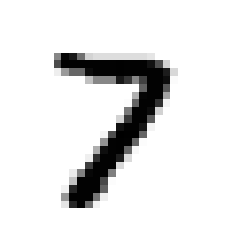

In [9]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [10]:
y[4000]

'7'

# Splitting test and train set

In [11]:
x_train , x_test = x[0:8000], x[8000:10000] 
y_train , y_test = y[0:8000], y[8000:10000]

Here I reduced the size of the dataset because of hardware bottleneck

# Disable Warnings

In [12]:
import warnings
warnings.filterwarnings('ignore') #disabled warnings which might occur because of hardware limitations

# Creating the model

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [14]:
y_train 

0       5
1       0
2       4
3       1
4       9
       ..
7995    8
7996    1
7997    6
7998    5
7999    4
Name: class, Length: 8000, dtype: int8

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(tol = 0.1, solver = 'lbfgs')

In [17]:
clf.fit(x_train,y_train) #training the classifier

LogisticRegression(tol=0.1)

In [18]:
clf.predict(x_train)

array([5, 0, 4, ..., 6, 5, 4], dtype=int8)

# Cross Validation Assessment

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
accuracy = cross_val_score(clf, x_train, y_train, cv = 3, scoring = "accuracy")

In [21]:
accuracy.mean()

0.8702498553022208

# Generating the Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [23]:
y_test_pred = cross_val_predict(clf, x_test, y_test, cv = 3)

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[191,   0,   5,   0,   1,   5,   2,   0,   0,   2],
       [  0, 212,   4,   1,   1,   0,   0,   1,   2,   0],
       [  4,   2, 161,   9,   2,   2,   5,   6,  11,   1],
       [  2,   4,  10, 171,   2,   9,   2,   7,   4,  10],
       [  1,   1,   0,   0, 156,   1,   2,   3,   3,  14],
       [  1,   1,   4,   9,   8, 123,   3,   0,   9,   3],
       [  4,   0,   2,   0,   4,   5, 197,   0,   3,   1],
       [  1,   1,   3,   2,   3,   0,   0, 187,   3,  17],
       [  5,  13,   7,   5,   3,  13,   7,   2, 133,   3],
       [  4,   0,   3,   4,   8,   4,   0,  17,   2, 141]], dtype=int64)

# Precision and Classification Report

In [25]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       206
           1       0.91      0.96      0.93       221
           2       0.81      0.79      0.80       203
           3       0.85      0.77      0.81       221
           4       0.83      0.86      0.85       181
           5       0.76      0.76      0.76       161
           6       0.90      0.91      0.91       216
           7       0.84      0.86      0.85       217
           8       0.78      0.70      0.74       191
           9       0.73      0.77      0.75       183

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000



In [26]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred, average='micro')

0.836

## Therefore, we've trained a Handwritten Digit Recognition model using the LinearRegression algorithm that is having a precision of 83.6%. 